# Model Validation

## Imports

 Data set from UCI Machine Learning Repository.
 
 Data set is from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan.
 
 This is a classification problem. The idea behind this extends to regression problems as well.

## Data cleansing and wrangling

In [15]:
# Data cleansing and wrangling.
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [16]:
df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})
target_name = "made_donation_in_march_2007"
df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [17]:
# df.to_csv("new_name_csv")


## AS INPUT
# raw_csv.csv

## After cleaning
# clean_csv.csv

## After Training
# csv -> scores


In [18]:
df.shape

(748, 5)

## Split the data into training and test data sets.

In [19]:
# Split the data into training and test data sets.

# Seperating the independent and dependent features.
X = df.drop(columns=[target_name])
y = df[target_name]

# Split data into train and test using k-fold cross-validation
# with independent test data set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42
                                                   )

## Define the metrics for which model is getting optimized.

 - Classification problem uses metrics like:
    - ![Accuracy and Recall](https://miro.medium.com/max/1400/1*ReG9pKObnyDwdgdqFjt1Tg.png)
    - precision:
        - How often are we correct in our positive prediction?
        - (TP) / (TP + FP)
    - recall:
        -  How often did we wrongly classify something as not true (= false)?
        - (TP) / (TP + FN)
    - accuracy:
        - Accuracy is how well the model performs
        - (TP + TN) / (TP + TN + FP + FN) 
    - f1_score:
        - Utilize the precision and recall to create a test’s accuracy through the “harmonic mean”.
        - It focuses on the on the left-bottom to right-top diagonal in the Confusion Matrix.
        - 2 * ((Precision * Recall) / (Precision + Recall))
        
    - AUC-ROC
        - Area Under Curve - Receiver Operator Characteristic
        - ![AUC-ROC](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)
        - TPR (True Positive Rate) / Recall /Sensitivity
            - ![AUC-ROC](https://miro.medium.com/max/710/1*HgxNKuUwXk9JHYBCt_KZNw.png)
        - FPR
            - ![AUC-ROC](https://miro.medium.com/max/490/1*3GhDfiuhvINF5-9eL8g6Pw.png)
        - ![AUC-ROC](https://miro.medium.com/max/1056/1*Uu-t4pOotRQFoyrfqEvIEg.png)
        - ![AUC-ROC](https://miro.medium.com/max/1014/1*yF8hvKR9eNfqqej2JnVKzg.png)
        - ![AUC-ROC](https://miro.medium.com/max/860/1*iLW_BrJZRI0UZSflfMrmZQ.png)
        - ![AUC-ROC](https://miro.medium.com/max/1112/1*aUZ7H-Lw74KSucoLlj1pgw.png)

 - Regression problem uses metrics like:
    - mean square error
        - $$ MSE = \frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{\hat{y_{i}} - y_{i}}{n}\Big)^2} $$
    - root mean absolute error
        - $$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{\hat{y_{i}} - y_{i}}{n}\Big)^2}} $$
        - ![RMSE](https://miro.medium.com/max/818/0*HF1h7speiHudyvj7.png)
    - F-Test
        - The F-Test is used to compare statistical models that were fitted to a dataset
        - it allows us to identify the model that best fits the population
        - ![F-Test](https://miro.medium.com/max/446/1*Neij87eIUNCbwXTAjJFneQ.png)
            - Explained Variance:  ![EV](https://miro.medium.com/max/326/1*kWY-24CnVvpX6WP3NV23-w.png)
            - UnExplained Variance:  ![uEV](https://miro.medium.com/max/414/1*xvN9bmMuHmeX0mWWHlL-Ow.png)
    - R-Squared score
        - R-Squared describes how well a model fits for a linear regression model.
        - The higher R, the better the fit.
        - ![Formula](https://miro.medium.com/max/788/1*GTGHrcbcSgT0bAGCywcbsw.png)
        - ![Formula](https://miro.medium.com/max/1002/1*asxJLYjc-nlCeNuXOnPZSA.png)
        - ![Visual](https://miro.medium.com/max/800/0*q_9SgzLvCy47B2sl.png)
            - SStot: red
            - SSres: blue

## Get quick initial metrics estimate

In [20]:
# Get quick initial metrics estimate.

# Using simple pandas value counts method
print(y_train.value_counts(normalize=True))

0    0.768271
1    0.231729
Name: made_donation_in_march_2007, dtype: float64


In [21]:
# Using sklearn accuracy_score
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
prediction = np.full(shape=y_train.shape, 
                     fill_value=majority_class)

accuracy_score(y_train, prediction)

0.768270944741533

The baseline accuracy score is approximately 77%.

## Data pre-processing

In [22]:
def min_max(array):
    min_ = min(array)
    max_ = max(array)
    transformed_array = []
    for x in array:
        mnmx = (x - min_) / (max_ - min_)## Data pre-processing
        transformed_array.append(mnmx)
    return transformed_array

def stdztion(array):
    mean_ = sum(array) / len(array)
#     std_ = std()
    transformed_array = []
    for x in array:
        mnmx = (x - mean_) / (std)## Data pre-processing
        transformed_array.append(mnmx)
    return transformed_array
    

min_max([0, 10, 300,  50])

[0.0, 0.03333333333333333, 1.0, 0.16666666666666666]

In [23]:
###    Data
###    X   y       [0, 10, 300,  50]
###    PreProcessing
###    X_  y_      [0.0, 0.03333333333333333, 1.0, 0.16666666666666666]
###    Model
###    X_ y_ -> prediction_ 
###              -> prediction



Data pre-processing converts features into format that is more suitable for the estimators.

RobustScaler for our example

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data

## Feature selection

Feature selection or dimensionality reduction on data sets helps to

    - Either to improve models’ accuracy scores
    - To boost their performance on very high-dimensional data sets.

 SelectKBest, univariate feature selection method.

With f_classif as a score_func

ANOVA F-value between label/feature for classification tasks.

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

## Model Selction

LogisticRegression

## Pipeline

In [24]:
###    Data
###    X   y       [0, 10, 300,  50]
###    PreProcessing
###    X_  y_      [0.0, 0.03333333333333333, 1.0, 0.16666666666666666]
###    FeatureSelection
###    X_sm  y_sm      [0.0, 0.16666666666666666]
###    Model
###    X_ y_ -> prediction_ 
###              -> prediction



In [25]:
# Data pre-processing, Feature selection and Model selection.

# Imports for pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(solver='lbfgs'))

## Hyper Parameters Optimisation

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [1, 2, 3],
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

# CV is Cross-Validation strategy
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                                   1.0, 10.0, 100.0, 1000.0,
                                                   10000.0],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'selectkbest__k': [1, 2, 3]},
             scoring='accuracy', verbose=1)

### Kfold interlude

#### Definition

Cross-validation is a statistical method used to estimate the skill of machine learning models

KFold is commonly used in applied machine learning to:

 - compare and select a model for a given predictive modeling problem
 - because it is:
     - easy to understand, 
     - easy to implement, 

Results in skill estimates with a lower bias than other methods

It is indicated principally for small datasets

Lets make use of 5-fold cross-validation with independent test data set

![Corss Validation](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-5-fold-CV.png)

#### Example

In [35]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(data):
    print(f'train: {data[train]}, test: {data[test]}')

train: [0.3 0.4 0.5 0.6], test: [0.1 0.2]
train: [0.1 0.2 0.4 0.5], test: [0.3 0.6]
train: [0.1 0.2 0.3 0.6], test: [0.4 0.5]


## Interpreting Results

### Best cross validation score

In [36]:
# Mean cross-validated score of the best_estimator. 
# For our problem set we got a best score of 78% for our very first iteration.
# This seems not much but we have already beaten our baseline accuracy score.
print('Cross Validation Score:', gridsearch.best_score_)

Cross Validation Score: 0.7771649810366623


### Best Parameters

In [37]:
# Best parameters which resulted in the best score
print('Best Parameters:', gridsearch.best_params_)

Best Parameters: {'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'selectkbest__k': 2}


### Best estimator

In [38]:
# Which features were selected?

# best_estimator_, estimator which gave highest score.
# Using this we can get the information about the selected features.
best_pipeline = gridsearch.best_estimator_
selector = best_pipeline.named_steps['selectkbest']
all_names = X_train.columns
# .get_support() -> Get a mask of selected features
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(f"\t{name}")

print()
print('Features not selected:')
for name in unselected_names:
    print(f"\t{name}")

Features selected:
	months_since_last_donation
	total_volume_donated

Features not selected:
	number_of_donations
	months_since_first_donation


## Plotting ROC

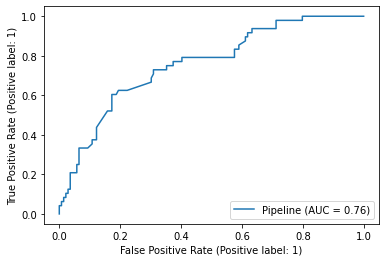

In [31]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

# Also works with models !
metrics.plot_roc_curve(gridsearch.best_estimator_, X_test, y_test)  
plt.show()  